I am putting this here to not disturb unattended run.

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PixBike Notebook
Authors: Ozan Karaali, H. Yildiz Basol

References (as Bibtex format): 

@article{Szell_Growing_urban_bicycle_2022,
author = {Szell, Michael and Mimar, Sayat and Perlman, Tyler and Ghoshal, Gourab and Sinatra, Roberta},
doi = {10.1038/s41598-022-10783-y},
journal = {Scientific Reports},
number = {6765},
pages = {1--14},
title = {{Growing urban bicycle networks}},
volume = {12},
year = {2022}
}

@inproceedings{isola2017image,
  title={Image-to-Image Translation with Conditional Adversarial Networks},
  author={Isola, Phillip and Zhu, Jun-Yan and Zhou, Tinghui and Efros, Alexei A},
  booktitle={Computer Vision and Pattern Recognition (CVPR), 2017 IEEE Conference on},
  year={2017}
}

## Data Collecting

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 985 kB 7.9 MB/s 
     |████████████████████████████████| 358 kB 76.5 MB/s 
     |████████████████████████████████| 139 kB 92.1 MB/s 
     |████████████████████████████████| 58 kB 6.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.11 which is incompatible.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machin

In [ ]:
import os
os.chdir('/content/')
!rm -rf ./nc # if there exists any remaining files in this folder, delete
!mkdir nc

In [ ]:
!wget https://ozankaraali.com/growbike_data.json -O data.json

--2022-08-20 21:17:09--  https://ozankaraali.com/growbike_data.json
Resolving ozankaraali.com (ozankaraali.com)... 185.199.111.153, 185.199.110.153, 185.199.108.153, ...
Connecting to ozankaraali.com (ozankaraali.com)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12104 (12K) [application/json]
Saving to: ‘data.json’

data.json           100%[===================>]  11.82K  --.-KB/s    in 0s      

2022-08-20 21:17:09 (35.9 MB/s) - ‘data.json’ saved [12104/12104]



In [ ]:
# Selenium connect to https://growbike.net/ and get screenshot of the page
import os
from PIL import Image
import numpy as np

from selenium import webdriver
import time
import uuid
import cv2
import json

from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--use-gl=egl')
# chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("window-size=1920,1080")

def screenshot():
    slider = driver.find_element("xpath", '/html/body/div/div/div/main/div[2]/div[2]/div[1]/input')

    slider.click()  # puts 20 on the slider
    for i in range(22):
        slider.send_keys(u'\ue012')  # arrow left

    canvas.screenshot("./testpure.png")

    slider.click()  # puts 20 on the slider
    for i in range(22):
        slider.send_keys(u'\ue014')  # arrow right
    canvas.screenshot("./testroads.png")

    img1 = Image.open('./testpure.png')
    img2 = Image.open('./testroads.png')
    new_width = 600
    new_height = 600

    width, height = img1.size  # Get dimensions
    left = (width - new_width) / 2
    top = (height - new_height) / 2
    right = (width + new_width) / 2
    bottom = (height + new_height) / 2

    # Crop the center of the image
    img1 = img1.crop((left, top, right, bottom))
    img2 = img2.crop((left, top, right, bottom))

    img1 = np.array(img1)
    img2 = np.array(img2)

    # set red range
    lowcolor = (58, 139, 161, 255)
    highcolor = (90, 190, 220, 255)

    # threshold
    thresh = cv2.inRange(img2, lowcolor, highcolor)

    # Method 1: count number of white pixels and test if zero
    count = np.sum(np.nonzero(thresh))
    found = False
    # print(count)
    if count < 10000:
        pass
    else:
        img3 = np.concatenate((img1, img2), axis=1)
        img3 = Image.fromarray(img3)
        img3.save('./nc/' + str(uuid.uuid4()) + '.png')
        found = True
    return found


def move(position):
    if position == 'left':
        for i in range(10):
            canvas.send_keys(u'\ue012')  # arrow left
    elif position == 'right':
        for i in range(10):
            canvas.send_keys(u'\ue014')
    elif position == 'up':
        for i in range(10):
            canvas.send_keys(u'\ue013')
    elif position == 'down':
        for i in range(10):
            canvas.send_keys(u'\ue015')

# read json file
data = json.load(open('data.json'))
x = list(data.keys())

for i in x:
    try:
      url = 'https://growbike.net/city/' + i

      driver = webdriver.Chrome('chromedriver', options=chrome_options)
      # driver.set_page_load_timeout(10)
      driver.get(url)

      time.sleep(7)

      # driver.set_window_size(1920, 1080)  # the trick

      driver.find_element("xpath", '//*[@id="__next"]/div/div/main/div[2]/div[3]/div[1]//*[local-name()="svg"]').click()

      canvas = driver.find_element("xpath", '//canvas[@class="mapboxgl-canvas"]')
      canvas.click()

      # canvas send + to zoom in

      time.sleep(1)
      for i in range(12 - data[i]['zoom']):
          canvas.send_keys("+")
          time.sleep(1)

      #keep like 8x8 grid, four up and four left to get starting point

      for i in range(10):
          move('left')
          if screenshot() is False:
              break
      for i in range(10):
          move('up')
          if screenshot() is False:
              break

      # then for each for four right, send a down and four left
      for j in range(10):
          for i in range(10):
              move('right')  # arrow right
              if screenshot() is False:
                  break

          move('down')  # arrow down
          if screenshot() is False:
              break

          for i in range(10):
              canvas.send_keys(u'\ue012')  # arrow left
              if screenshot() is False:
                  break

          move('down')  # arrow down
          if screenshot() is False:
              break

      # time.sleep(2)
      driver.quit()
    except:
      pass

Currently we should have around ~1000 images in /content/nc folder.

I will put here the codes for saving and preloading the data I have, to create a shortcut and then I will comment out, you can turn these on optionally.

In [ ]:
# To store data in Google Drive
!cp -R /content/nc /content/drive/MyDrive/nc20aug

In [ ]:
# To load back data from Google Drive
# import os
# os.chdir('/content/')
# !rm -rf ./nc # if there exists any remaining files in this folder, delete
# !mkdir nc
# !cp -R /content/drive/MyDrive/nc20aug/* /content/nc

In [ ]:
!rm -rf /content/pytorch-CycleGAN-and-pix2pix/datasets/pixbike
!rm -rf /content/pytorch-CycleGAN-and-pix2pix/datasets/pixbike-split

## Using Pix2Pix

In [ ]:
# If you download from Google Drive
# import os
# os.chdir('/content/')
# !rm -rf ./pytorch-CycleGAN-and-pix2pix # if there exists any remaining files in this folder, delete
# !mkdir pytorch-CycleGAN-and-pix2pix
# !cp -R /content/drive/MyDrive/pix2pix1/* /content/pytorch-CycleGAN-and-pix2pix

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2452, done.
remote: Total 2452 (delta 0), reused 0 (delta 0), pack-reused 2452
Receiving objects: 100% (2452/2452), 8.18 MiB | 14.80 MiB/s, done.
Resolving deltas: 100% (1538/1538), done.


In [ ]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
rm -rf /content/pytorch-CycleGAN-and-pix2pix/datasets/pixbike/

In [ ]:
!mkdir /content/pytorch-CycleGAN-and-pix2pix/datasets/pixbike/

In [ ]:
!cp -R /content/nc /content/pytorch-CycleGAN-and-pix2pix/datasets/pixbike

In [ ]:
import splitfolders
os.chdir('/content/pytorch-CycleGAN-and-pix2pix/datasets/')
splitfolders.ratio('pixbike', output="pixbike-split", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 1278 files [00:00, 1419.64 files/s]


In [ ]:
!mv /content/pytorch-CycleGAN-and-pix2pix/datasets/pixbike-split/test/nc/* /content/pytorch-CycleGAN-and-pix2pix/datasets/pixbike-split/test
!mv /content/pytorch-CycleGAN-and-pix2pix/datasets/pixbike-split/train/nc/* /content/pytorch-CycleGAN-and-pix2pix/datasets/pixbike-split/train
!mv /content/pytorch-CycleGAN-and-pix2pix/datasets/pixbike-split/val/nc/* /content/pytorch-CycleGAN-and-pix2pix/datasets/pixbike-split/val

In [ ]:
!rm -rf /content/pytorch-CycleGAN-and-pix2pix/datasets/pixbike-split/test/nc/
!rm -rf /content/pytorch-CycleGAN-and-pix2pix/datasets/pixbike-split/train/nc/
!rm -rf /content/pytorch-CycleGAN-and-pix2pix/datasets/pixbike-split/val/nc/

In [ ]:
# If we want to save it in Google Drive
# !cp -R /content/pytorch-CycleGAN-and-pix2pix/datasets/pixbike-split/ /content/drive/MyDrive/pixbike-split

In [ ]:
os.chdir('/content/pytorch-CycleGAN-and-pix2pix/')

# Training

-   `python train.py --dataroot ./datasets/pixbike-split --name pixbike --model pixbike --direction AtoB --use_wandb`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [ ]:
!python train.py --dataroot ./datasets/pixbike-split --name pixbike --model pix2pix --direction AtoB --use_wandb --batch_size 32 --lr 0.001

----------------- Options ---------------
               batch_size: 32                            	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/pixbike-split      	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
 

# Testing

-   `python test.py --dataroot ./datasets/pixbike-split --direction AtoB --model pixbike --name pixbike`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [ ]:
!python test.py --dataroot ./datasets/pixbike-split --direction AtoB --model pix2pix --name pixbike --use_wandb --epoch 55

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/pixbike-split      	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: 55                            	[default: latest]
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0          

# Visualization
More can be found in W&B data but let's render locally:

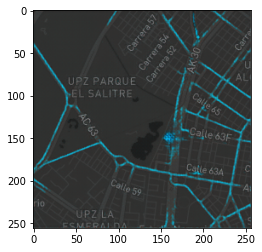

In [ ]:
import matplotlib.pyplot as plt
# These images might not be in your run since UUIDs won't match if you didn't preload, please refer to the
# ./results/pixbike/test_latest/images/ folder
img = plt.imread('./results/pixbike/test_55/images/046cce94-43ec-4b03-8589-f5137fef9936_fake_B.png')
plt.imshow(img)

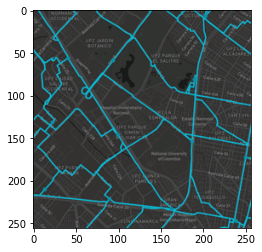

In [ ]:
img = plt.imread('./results/pixbike/test_60/images/046cce94-43ec-4b03-8589-f5137fef9936_real_B.png')
plt.imshow(img)

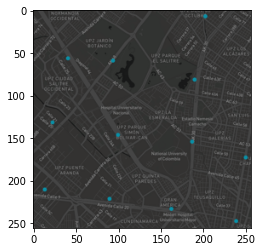

In [ ]:
img = plt.imread('./results/pixbike/test_60/images/046cce94-43ec-4b03-8589-f5137fef9936_real_A.png')
plt.imshow(img)

In [ ]:
# We can save all the folder in Google Drive
# !cp -R /content/pytorch-CycleGAN-and-pix2pix/ /content/drive/MyDrive/pixbike-project

In [ ]:
# We can save all the folder in Google Drive
!cp -R /content/pytorch-CycleGAN-and-pix2pix/ /content/drive/MyDrive/pixbike-project-21aug-save-2